In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("yelp.csv")
print(df.head())
print("\nColumns:", df.columns.tolist())

              business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0  
2  0hT2KtfLiobPvh6cDC8JQg     0    

In [3]:
df = df[['text', 'stars']].dropna()
df['stars'] = df['stars'].astype(int)

In [4]:
tfidf = TfidfVectorizer(stop_words='english', max_features=10000)
X = tfidf.fit_transform(df['text'])
y = df['stars']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [6]:
model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
model.fit(X_train, y_train)


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [7]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5075

Classification Report:
               precision    recall  f1-score   support

           1       0.71      0.38      0.50       150
           2       0.45      0.18      0.26       185
           3       0.40      0.20      0.27       292
           4       0.46      0.63      0.54       705
           5       0.57      0.63      0.60       668

    accuracy                           0.51      2000
   macro avg       0.52      0.40      0.43      2000
weighted avg       0.51      0.51      0.49      2000



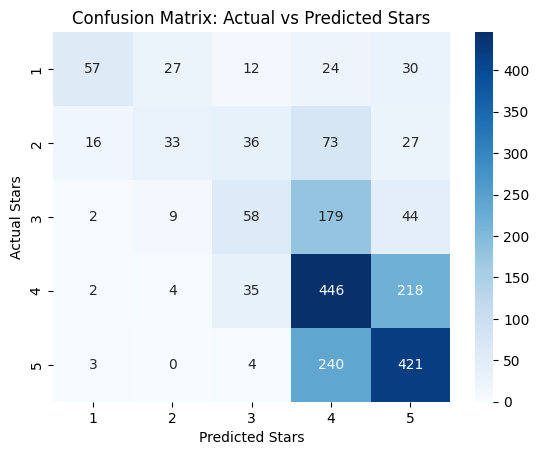

In [8]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=model.classes_, yticklabels=model.classes_, cmap='Blues')
plt.title("Confusion Matrix: Actual vs Predicted Stars")
plt.xlabel("Predicted Stars")
plt.ylabel("Actual Stars")
plt.show()